# Проектная работа 3 Курс 2021/2022

# Идентификация фунции фитнеса методами машинного обучения

# Этап 0 | Постановка задачи | Ожидаемый результат

Цель проекта: Восстановление функции фитнеса, с помощью различных методов машинного обучения

План работы:
- Теоретический модуль
   1. Для начала стоит изучить доступную литературу по данному предмету (список находится в конце Этапа 0)
   2. Изучить базовые возможности и синтаксис языка программирования Python
   3. Создание и исследование математической модели
   4. Ознакомление с возможностями Jupiter Notebook
- Практический модуль
   1. Создание обучающей выборки
   2. Обучение классификаторов
   3. Правка багов и аномалий (тестирование и исправление ошибок)
   4. Написание финального отчета по окончаю проекта

Краткое изложение всей теоретической базы (*За более подробными данными в список литературы*)

Функция фитнеса - это функция биологической приспособленности
- Благодаря выявлению функции фитнеса есть возможность найти оптимальное решение
- Следовательно найти оптимальную стратегию поведения

Фитнес всегда определятеся по разному, но по всем (**моим**) наблюдениям это какая-то функция, которая зависит от различных параметров. Эти параметры (*Макропараметры*) в данной проектной работе представляют из себя описание окружающей среды, количество хищников, естественную смертность и тд. (*Более подробно в Этапе 1)

> Читатель: Почему объектом изучения является Зоопланктон?

> Breketov: Ну потому что это хорошо изученные организмы, + они перемещаются по всеми известной синусоиде (**Ни в коем случае не путать с косинусоидой о которой как оказалось никто не знает**)

> Breketov: Кстати говоря их перемещения носят отдельной научное название - суточные вертикальные миграции (СВМ) или на english (DVM - Diel vertical migration)

> Breketov: Ну а еще если переводить это в математику, то окажется, что выходит довольно простая система, с большим количесвом эмпирических данных

> Читатель: Я понял, можешь больше не продолжать, душнила.

> Высший разум: Рыбка плавать вверх и вниз и вкусно получать (Это шутка)

Ну и после небольших бед с б**кой можно поговорить об обучающей выборке:
- Выборка - конечный отбор чего-то с известной принадлежностью к одному из двух множеств
- И в работе необходимо будет создать обучающую выборку, в которой представлены признаки и принадлежность к определенному классу

В проектной работе в качестве стратегий будут две синусоиды (**НЕ КОСИНУСОИДЫ**), где одна относится к молодым особям, ну то есть к джунам, а другая к взрослым, ну или к сеньорам. Ну и касаемо ранжирования стоит сказать что в данном случае у нас будут сравниваться i-ый элемент с со всеми j-ими.

В проекте мы реализуем 2 главных метода классификации:
- Метод опорных векторов или на english мове (SVM)
- Фишеровский дискриминант или на мове (LDA)
- *Бонусом можно обучить нейронную сеть, но это если будет желание)

Ну и в итоге планируется получить как можно более точные и правдоподобные результаты (*по крайней мере чтобы не оказалось так, что хищники увеличили популяцию зооплантончика нашего ненаглядного*)

Чорт, чуть не забыл про литературу нашу любимую:

- [*Exploring Evolutionary Fitness in Biological Systems Using Machine Learning Methods*](https://www.mdpi.com/1099-4300/23/1/35/htm)
- [*Лекции от Вышки по МО*](https://github.com/esokolov/ml-course-hse)
- [*Почему только 2, а потому что все легко гуглится мы же в 21 веке живем чувак) Это кстати тоже ссылка можешь перейти*](https://www.youtube.com/watch?v=dQw4w9WgXcQ)

# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки (Теория)

Пусть имеют место параметризации функций окружающей среды:

- $E(x)$ - пространственное распределение пищи по вертикальной координате $x$

- $S(x)$ - пространственное распределение хищников по вертикальной координате $x$

- $S(t)$ - активность хищников

- $G(x)$ - совокупность дополнительных факторов окружающей среды, типо перепадов температур, радиция и тд.

И нам известны параметры $D$ - максимальная глубина и $D_0$ - оптимальная глубина. А так же $\sigma_1 = 1$, $\sigma_2 = 1$
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$ стратегии две стадии жизнии зоопланктона: молодых и взрослых особей
$$
x_{J} = A_{J} + B_{J}cos(2\pi\tau)\ \ \ \ \ \ x_{A} = A_{A} + B_{A}cos(2\pi\tau)
$$

Где мы должны ограничения для параметров A и B такие что: $ -D < A < 0$, $|B| < min(A + D, -A)$

Ключевыми макропараметрами являются:

$ M_1 $ и $ М_5 $ - количество потребляемой пищи в сутки

$ M_2 $ и $ М_6 $ - суточная смертность от хищников

$ M_3 $ и $ М_7 $ - метаболическая стоимость вертикальной миграции

$ M_4 $ и $ М_8 $ - смертность зоопланктона от неблагоприятных условий среды

        Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ji}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{Ji}(\tau))^2d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{Ji}(\tau))d\tau
$$
        Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{Ai}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{Ai}(\tau))^2d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{Ai}(\tau))d\tau
$$

Известная функция фитнеса: $ J = -s-p-q+\sqrt[2]{4rp+(p+q-s)^2} $

С коэффициентами:

$ r_i = \alpha_{A} M_5 + \beta_{A} M_7 + \delta_{A} M_8 $


$ s_i = \gamma_{A}M_6 $


$ p_i = \alpha_{J}M_1 + \beta_{J} M_3 + \delta_{J} M_4 $


$ q_i = \gamma_{J}M_2 $

## 2. План действий

### 2.1 Прямой ход работы
Мы генериеруем ключевые параметры А и В стратегий $v_i$ для двух стадий зоопланктона: молодых и взрослых особей. 

Далее мы с помощью А и В уже находим макропараметры $M_1,...,M_8$ и уже зная их мы можем с помощью имеющихся эмпирических данных посчитать значения функции фитнеса для всех стратегий. 

Следующим шагом нам предстоит воспользоваться сравнением пар получившихся значений фитнеса, чтобы разбить их на два базовых класс и уже эти классы мы предъявим нашему классификатору для непосредственного ранжирования с помощью метода опорных векторов или линейного дискриминанта Фишера 

### 2.2 Программный ход работы

Производим генерацию параметров стратегий, далее просчитываем макропараметры для каждой стратегии. Имея это можем найти значения известной функции фитнеса, а следовательно можем разделить на классы и уже непосредственно сформировать обучающую выборку, после ее формирования производим обучение моделей и получаем из этих моделей коэффициенты гиперплоскости, те в свою очередь являются коэффициентами функции фитнеса. На этом пока все, далее будет 2 Этап.

## 3. Реализация

### 3.1 Подготовка всех исходных данных

In [181]:
# Эмпирические данные 
alpha_j = 0.0016
alpha_a = 0.006
betta_j = 0.0000007
betta_a = 0.000000075
gamma_j = 0.00008
gamma_a = 0.004
delta_j = 0.000016
delta_a = 0.00006
sigma1 = 1
sigma2 = 1

D = 120
D0 = 70  

Nmax = 30

In [182]:
import random as rn
import pandas as pd
# Генерация параметров для стратегий
# Запись параметров  
def rand_AB(Nmax):
   A_j, B_j, A_a, B_a = [], [], [], []
   for i in range(0, Nmax):
      Aj = round(rn.uniform(-D, 0), 4)
      Bj = round(rn.uniform(-min(Aj + D, -Aj), min(Aj + D, -Aj)), 4)
      A_j.append(Aj)
      B_j.append(Bj)

      Aa = round(rn.uniform(-D, 0), 4)
      Ba = round(rn.uniform(-min(Aa + D, -Aa), min(Aa + D, -Aa)), 4)
      A_a.append(Aa)
      B_a.append(Ba)
   data_strat = {'A_J': A_j, 'B_J': B_j, 'A_A': A_a, 'B_A': B_a}
   data = pd.DataFrame(data = data_strat)
   data.to_csv("data_strat.csv", index=False)
   return data
data_strat = rand_AB(Nmax)
data_strat

,A_J,B_J,A_A,B_A
0,-31.1162,6.1121,-28.7442,-28.0613
1,-29.7018,-18.1012,-82.7677,-22.5557
2,-85.2132,-29.2066,-10.6679,5.3233
3,-118.7219,-0.3260,-82.2638,11.7420
4,-87.9416,5.4346,-32.0657,31.8276
5,-8.0604,4.4015,-95.7414,-8.0706
6,-106.9924,-1.1858,-94.6667,9.1252
7,-24.8175,10.5143,-111.3343,-1.2218
8,-88.5546,21.6596,-113.6696,0.4865
9,-118.2578,-0.7886,-80.9536,34.4998


In [183]:
import numpy as np
from collections import defaultdict
# Нормализуем макропараметры для увеличения скорости классификатора
def macro_norm(collect, collect_M, collect_MM):
   M1 = defaultdict(list)
   M2 = defaultdict(list)
   M3 = defaultdict(list)
   for i in range(1, 9):
      Z = list(np.array(collect['M' + str(i)])/max(np.abs(collect['M' + str(i)])))
      M1['M' + str(i) + '_n'].append(Z)
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            Z = np.array(collect_M['M' + str(i) + 'M' + str(j)])/max(np.abs(collect_M['M' + str(i) + 'M' + str(j)])[0])
            M2['M' + str(i) + 'M' + str(j) + '_n'].append(list(Z[0]))
         else:
            continue   
   for i in range(2, 9):
      for j in range(1, i):
         Z = np.array(collect_MM['M' + str(i) + 'M' + str(j)])/max(np.abs(collect_MM['M' + str(i) + 'M' + str(j)])[0])
         M3['M' + str(i) + 'M' + str(j) + '_n'].append(list(Z[0]))
   return M1, M2, M3

In [184]:
import pandas as pd
import numpy as np
from collections import defaultdict
# Подсчет макропараметров
def macroparams(data_strat):
   Aj = data_strat['A_J'].tolist()
   Bj = data_strat['B_J'].tolist()
   Aa = data_strat['A_A'].tolist()
   Ba = data_strat['B_A'].tolist()
   collect = defaultdict(list)
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)
   for i in range(1, 9):
      collect['M' + str(i)] = []
   for i in range(0, Nmax):
      collect['M1'].append(sigma1*(Aj[i] + D))
      collect['M2'].append(-sigma2*(Aj[i] + D + Bj[i]/2))
      collect['M3'].append(-2*(np.pi*Bj[i])**2)
      collect['M4'].append(-((Aj[i] + D0)**2 + (Bj[i]**2)/2))
      collect['M5'].append(sigma1*(Aa[i] + D))
      collect['M6'].append(-sigma2*(Aa[i] + D + Ba[i]/2))
      collect['M7'].append(-2*(np.pi*Ba[i])**2)
      collect['M8'].append(-((Aa[i] + D0)**2 + (Ba[i]**2)/2)) 
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            Z = np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
            collect_M['M' + str(i) + 'M' + str(j)].append(Z)
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         Z = 2*np.array(collect['M' + str(i)])*np.array(collect['M' + str(j)])
         collect_MM['M' + str(i) + 'M' + str(j)].append(Z)

   M1, M2, M3 = macro_norm(collect, collect_M, collect_MM)
   data_macro = {}
   data = pd.DataFrame(data = data_macro)
   for i in range(1, 9):
      data['M' + str(i)] = M1['M' + str(i) + '_n'][0]
   for i in range(1, 9):
      for j in range(1, 9):
         if i == j:
            data['M' + str(i) + 'M' + str(j)] = M2['M' + str(i) + 'M' + str(j) + '_n'][0]
         else:
            continue
   for i in range(2, 9):
      for j in range(1, i):
         data['M' + str(i) + 'M' + str(j)] = M3['M' + str(i) + 'M' + str(j) + '_n'][0]
   data.to_csv("data_macro.csv", index=False)
   return data
data_macro = macroparams(data_strat)
data_macro

,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M2M2,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,0.742173,-0.766979,-0.018992,-0.314510,0.786710,-0.664962,-6.362371e-01,-0.481155,0.550820,0.588257,...,4.347697e-01,-8.066961e-01,5.780534e-01,-0.392932,0.426336,0.009791,0.209594,-0.378529,0.321020,8.373671e-01
1,0.753983,-0.677783,-0.166577,-0.367347,0.320977,-0.223486,-4.110702e-01,-0.095827,0.568490,0.459389,...,3.280942e-01,-2.126505e-01,1.255215e-01,-0.079502,0.075035,0.017103,0.048756,-0.030758,0.021488,1.077501e-01
2,0.290467,-0.168375,-0.433672,-0.135195,0.942545,-0.964344,-2.289630e-02,-0.811460,0.084371,0.028350,...,6.725605e-03,-3.478111e-02,3.016820e-02,-0.259353,0.157844,0.377053,0.151945,-0.764837,0.785145,5.082118e-02
3,0.010672,-0.009302,-0.000054,-0.487779,0.325321,-0.375488,-1.114006e-01,-0.050357,0.000114,0.000087,...,1.180636e-01,-5.840852e-02,5.715260e-02,-0.000591,0.000541,0.000003,0.034020,-0.016382,0.018972,1.534465e-02
4,0.267685,-0.290105,-0.015015,-0.069178,0.758076,-0.894204,-8.184858e-01,-0.446659,0.071655,0.084161,...,1.230224e-01,-1.000000e+00,1.000000e+00,-0.131561,0.149698,0.007186,0.042796,-0.338602,0.400741,1.000000e+00
5,0.934687,-0.952180,-0.009849,-0.790309,0.209132,-0.174137,-5.262778e-02,-0.159604,0.873640,0.906647,...,9.036857e-02,-1.773827e-02,1.252153e-02,-0.164149,0.175569,0.001684,0.174704,-0.033378,0.027886,2.297588e-02
6,0.108612,-0.103566,-0.000715,-0.281328,0.218397,-0.257424,-6.728034e-02,-0.149249,0.011797,0.010726,...,4.112507e-02,-2.368157e-02,2.366410e-02,-0.017837,0.017857,0.000114,0.058155,-0.032595,0.038549,2.746699e-02
7,0.794766,-0.837886,-0.056203,-0.430832,0.074706,-0.069357,-1.206156e-03,-0.392423,0.631654,0.702053,...,1.129061e-03,-1.452238e-04,1.143006e-04,-0.343179,0.379860,0.023631,0.234165,-0.029316,0.027309,1.294703e-03
8,0.262567,-0.352668,-0.238506,-0.118939,0.054574,-0.056604,-1.912357e-04,-0.437853,0.068941,0.124374,...,4.941966e-05,-1.682018e-05,1.478992e-05,-0.126501,0.178393,0.111893,0.072130,-0.023895,0.024867,2.290393e-04
9,0.014547,-0.011244,-0.000316,-0.478584,0.336616,-0.484750,-9.616932e-01,-0.164176,0.000212,0.000126,...,1.000000e+00,-5.217327e-01,6.369519e-01,-0.002628,0.002133,0.000056,0.108825,-0.055264,0.079851,4.318755e-01


In [185]:
import pandas as pd
from collections import defaultdict
# Считаем фитнесс
def fitness(Nmax):
   M1 = data_macro['M1'].tolist()
   M2 = data_macro['M2'].tolist()      
   M3 = data_macro['M3'].tolist()   
   M4 = data_macro['M4'].tolist()   
   M5 = data_macro['M5'].tolist()
   M6 = data_macro['M6'].tolist()
   M7 = data_macro['M7'].tolist()
   M8 = data_macro['M8'].tolist()
   J = []
   r, s, p, q = 0, 0, 0, 0
   for i in range(0, Nmax):
      r = alpha_a*M5[i] + betta_a*M7[i] + delta_a*M8[i]
      s = gamma_a*M6[i]
      p = alpha_j*M1[i] + betta_j*M3[i] + delta_j*M4[i]
      q = gamma_j*M2[i]
      if ((4*r*p + (p + q - s)**2) < 0):
         J.append(0)
      else:
         j = -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
         J.append(j)
   data = pd.read_csv('data_macro.csv')
   data.insert(0, 'J', J)
   data = pd.DataFrame(data = data)
   data.to_csv('data_fit.csv', index=False)
   return data

data_fit = fitness(Nmax)
data_fit

,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
0,0.007579,0.742173,-0.766979,-0.018992,-0.314510,0.786710,-0.664962,-6.362371e-01,-0.481155,0.550820,...,4.347697e-01,-8.066961e-01,5.780534e-01,-0.392932,0.426336,0.009791,0.209594,-0.378529,0.321020,8.373671e-01
1,0.003406,0.753983,-0.677783,-0.166577,-0.367347,0.320977,-0.223486,-4.110702e-01,-0.095827,0.568490,...,3.280942e-01,-2.126505e-01,1.255215e-01,-0.079502,0.075035,0.017103,0.048756,-0.030758,0.021488,1.077501e-01
2,0.008785,0.290467,-0.168375,-0.433672,-0.135195,0.942545,-0.964344,-2.289630e-02,-0.811460,0.084371,...,6.725605e-03,-3.478111e-02,3.016820e-02,-0.259353,0.157844,0.377053,0.151945,-0.764837,0.785145,5.082118e-02
3,0.003028,0.010672,-0.009302,-0.000054,-0.487779,0.325321,-0.375488,-1.114006e-01,-0.050357,0.000114,...,1.180636e-01,-5.840852e-02,5.715260e-02,-0.000591,0.000541,0.000003,0.034020,-0.016382,0.018972,1.534465e-02
4,0.008028,0.267685,-0.290105,-0.015015,-0.069178,0.758076,-0.894204,-8.184858e-01,-0.446659,0.071655,...,1.230224e-01,-1.000000e+00,1.000000e+00,-0.131561,0.149698,0.007186,0.042796,-0.338602,0.400741,1.000000e+00
5,0.002726,0.934687,-0.952180,-0.009849,-0.790309,0.209132,-0.174137,-5.262778e-02,-0.159604,0.873640,...,9.036857e-02,-1.773827e-02,1.252153e-02,-0.164149,0.175569,0.001684,0.174704,-0.033378,0.027886,2.297588e-02
6,0.002385,0.108612,-0.103566,-0.000715,-0.281328,0.218397,-0.257424,-6.728034e-02,-0.149249,0.011797,...,4.112507e-02,-2.368157e-02,2.366410e-02,-0.017837,0.017857,0.000114,0.058155,-0.032595,0.038549,2.746699e-02
7,0.001159,0.794766,-0.837886,-0.056203,-0.430832,0.074706,-0.069357,-1.206156e-03,-0.392423,0.631654,...,1.129061e-03,-1.452238e-04,1.143006e-04,-0.343179,0.379860,0.023631,0.234165,-0.029316,0.027309,1.294703e-03
8,0.000776,0.262567,-0.352668,-0.238506,-0.118939,0.054574,-0.056604,-1.912357e-04,-0.437853,0.068941,...,4.941966e-05,-1.682018e-05,1.478992e-05,-0.126501,0.178393,0.111893,0.072130,-0.023895,0.024867,2.290393e-04
9,0.003910,0.014547,-0.011244,-0.000316,-0.478584,0.336616,-0.484750,-9.616932e-01,-0.164176,0.000212,...,1.000000e+00,-5.217327e-01,6.369519e-01,-0.002628,0.002133,0.000056,0.108825,-0.055264,0.079851,4.318755e-01


In [186]:
def classificator(differ):
   if differ[0] < 0:
      return -1
   else:
      return 1
      
def data_class():
   data_fit_macro = fitness(Nmax)
   target = []
   for i in range(0, Nmax):
      for j in range(i + 1, Nmax):
         differ_ = data_fit_macro.loc[i] - data_fit_macro.loc[j]
         target_ = classificator(differ_)
         target.append(differ_.append(pd.Series(target_, index =['target'])))
   data = pd.DataFrame(data = target)
   data.to_csv('data_fit_macro_target.csv', index=False)
   return data
 
data = data_class()
data


,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,target
0,0.004173,-0.011810,-0.089197,0.147584,0.052837,0.465733,-0.441476,-0.225167,-0.385327,-0.017670,...,-0.594046,0.452532,-0.313430,0.351301,-0.007312,0.160838,-0.347771,0.299533,0.729617,1.0
1,-0.001206,0.451706,-0.598605,0.414679,-0.179315,-0.155835,0.299382,-0.613341,0.330305,0.466449,...,-0.771915,0.547885,-0.133579,0.268493,-0.367261,0.057649,0.386308,-0.464125,0.786546,-1.0
2,0.004551,0.731501,-0.757677,-0.018938,0.173269,0.461389,-0.289474,-0.524836,-0.430798,0.550707,...,-0.748288,0.520901,-0.392340,0.425795,0.009788,0.175574,-0.362147,0.302049,0.822022,1.0
3,-0.000449,0.474488,-0.476874,-0.003977,-0.245332,0.028634,0.229242,0.182249,-0.034495,0.479165,...,0.193304,-0.421947,-0.261370,0.276638,0.002605,0.166798,-0.039928,-0.079721,-0.162633,-1.0
4,0.004853,-0.192514,0.185201,-0.009143,0.475799,0.577579,-0.490826,-0.583609,-0.321550,-0.322819,...,-0.788958,0.565532,-0.228783,0.250767,0.008107,0.034891,-0.345151,0.293134,0.814391,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,0.000658,0.108532,-0.096240,-0.002845,0.222474,0.056609,-0.024696,0.116503,-0.163833,0.014940,...,0.169766,-0.154251,-0.112329,0.105287,0.002823,-0.174477,-0.202483,0.183083,-0.227284,1.0
431,0.005055,-0.876905,0.887107,-0.002949,0.743966,0.675336,-0.788807,0.309784,-0.817179,-0.984848,...,0.117498,-0.057532,-0.012806,0.002619,0.002924,0.185260,-0.865351,0.900197,-0.019882,1.0
432,-0.007444,0.935742,-0.907854,-0.018015,-0.361808,-0.898188,0.945986,0.142515,0.233162,0.902868,...,0.216105,-0.194497,-0.533346,0.542603,0.010036,0.106866,0.682677,-0.723265,-0.296499,-1.0
433,-0.003047,-0.049695,0.075493,-0.018119,0.159683,-0.279460,0.181875,0.335797,-0.420185,-0.096920,...,0.163837,-0.097778,-0.433824,0.439934,0.010138,0.466604,0.019809,-0.006151,-0.089097,-1.0


### 3.2 Реализация машинного обучения для SVM и LDA

In [187]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Разедляем данные на обучающую и тестовую выборки
X = data.iloc[:, 1:-1].values 
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [188]:
# Реализуем SVM
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'linear')
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)

# Получим коэффициенты гиперплоскости
SVC_coef = SVC_model.coef_.tolist()
SVC_coef = SVC_coef[0]
SVC_coef

[0.3870722287126915,
 -0.22286427867182396,
 -0.05904699848043134,
 0.5999461534325423,
 1.2551538706463394,
 -2.155385529104359,
 -0.2909917910336216,
 0.6246682068906322,
 0.1155841753949671,
 0.14879340053142137,
 -0.3205775151963867,
 0.14395525364970152,
 0.8664611511918198,
 2.058440725526893,
 0.06927657627400641,
 0.10570411814242975,
 -0.13119295511968745,
 -0.12160253075661755,
 -0.10618656232032234,
 0.07986345991880556,
 -0.08538563732708364,
 -0.2937148130906537,
 0.9138770596100876,
 -0.5424519395827961,
 -0.19918889060468764,
 -0.28655885616766197,
 -1.2872561012751529,
 0.9560860759381032,
 0.30698596690995417,
 0.37563730621432867,
 -1.4647038438538271,
 0.014547425829733895,
 -0.04348669626852131,
 -0.17004824389716056,
 0.6473869971707251,
 0.10997237294030593,
 0.4120357739913193,
 0.6200377116400986,
 -0.9870665981821831,
 -0.26160668516244334,
 -0.9028749598275955,
 -0.5641464180521607,
 0.9404729303660884,
 -0.4204841183908694]

In [189]:
# Реализуем LDA
from sklearn import discriminant_analysis
LDA_model = discriminant_analysis.LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_prediction = LDA_model.predict(X_test)

# Получим коэффициенты гиперплоскости
LDA_coef = LDA_model.coef_.tolist()
LDA_coef = LDA_coef[0]
LDA_coef

[5.588118900866253,
 4.878854987345459,
 -10.550583337223255,
 1.6136615585603222,
 -1.084842188792627,
 -1.3409602889997716,
 6.46280633833712,
 7.018777562066582,
 3.897491506847743,
 -2.106185376911639,
 8.264660988405096,
 -2.146246285563856,
 -3.0252882725317054,
 11.589853022570939,
 4.022507250037047,
 8.99533318098803,
 -0.8434997170059515,
 19.363190113509795,
 -10.924674499023567,
 3.288673802083336,
 2.0398887859004406,
 12.607256448420742,
 -22.2357578429258,
 -3.1203310820801775,
 -16.789421187964727,
 -8.071405219074952,
 -5.245680707570143,
 19.347461812357764,
 -4.31736255963874,
 -9.593732170178722,
 -4.493266430708291,
 5.020814532413155,
 7.278304534951472,
 -0.5422586005793737,
 7.409573497321531,
 -9.569694738864529,
 -13.125708124903504,
 3.246084551641986,
 -1.8175167691405347,
 -18.69831105615623,
 1.9466252000965092,
 12.830953421125422,
 6.326951858908072,
 0.20372551591666377]

In [190]:
# Считаем разницу SVM и LDA (KNN)
from sklearn.metrics import accuracy_score
from sklearn import model_selection
print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(SVC_model, X, y)
LDA = model_selection.cross_val_score(LDA_model, X, y)
print('Логарифмическая потеря:')
print('     SVM: ', SVM.mean())
print('     LDA: ', LDA.mean())



Точность классификатора:
     SVM:  0.9885057471264368
     LDA:  0.9655172413793104
Логарифмическая потеря:
     SVM:  0.9632183908045976
     LDA:  0.8804597701149426


### 3.3 Графики 

#### 3.3.1 Двумерные

In [191]:
""" import matplotlib.pyplot as plt
X=data_class().loc[:,'M1':'M8M7']
y=data_class().loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        x=np.linspace(-1, 1)
        plt.figure(figsize=(7, 7))
        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')
        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')
        plt.xlim(-1,)
        plt.ylim(-1,1)
        plt.legend()
        plt.xlabel(X.columns[i])
        plt.ylabel(X.columns[j])
        plt.grid()
        plt.show() """

" import matplotlib.pyplot as plt\nX=data_class().loc[:,'M1':'M8M7']\ny=data_class().loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(len(X.columns)):\n    for j in range(i + 1, len(X.columns)):\n        x=np.linspace(-1, 1)\n        plt.figure(figsize=(7, 7))\n        plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')\n        plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')\n        plt.plot(x, (-1)* SVC_coef[i] / SVC_coef[j] * x, label='SVM')\n        plt.plot(x, (-1)* LDA_coef[i] / LDA_coef[j] * x, label='LDA')\n        plt.xlim(-1,)\n        plt.ylim(-1,1)\n        plt.legend()\n        plt.xlabel(X.columns[i])\n        plt.ylabel(X.columns[j])\n        plt.grid()\n        plt.show() "

#### 3.3.2 Трехмерные

In [192]:
""" import matplotlib.pyplot as plt
X=data_class().loc[:,'M1':'M8']
y=data_class().loc[:,'target']
X1 = X[y==1]
X0 = X[y==-1]
for i in range(len(X.columns)):
    for j in range(len(X.columns)):
        for k in range(len(X.columns)):
            if i == j or j == k or i == k:
                continue
            u, v = np.mgrid[-1:1:20j, -1:1:20j]
            fig = plt.figure(figsize=(10, 10))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')
            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')
            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')
            ax.set_xlabel(X.columns[i])
            ax.set_ylabel(X.columns[j])
            ax.set_zlabel(X.columns[k])
            plt.legend()
            plt.grid()
            plt.show() """

" import matplotlib.pyplot as plt\nX=data_class().loc[:,'M1':'M8']\ny=data_class().loc[:,'target']\nX1 = X[y==1]\nX0 = X[y==-1]\nfor i in range(len(X.columns)):\n    for j in range(len(X.columns)):\n        for k in range(len(X.columns)):\n            if i == j or j == k or i == k:\n                continue\n            u, v = np.mgrid[-1:1:20j, -1:1:20j]\n            fig = plt.figure(figsize=(10, 10))\n            ax = fig.add_subplot(111, projection='3d')\n            ax.scatter(X1[X.columns[i]], X1[X.columns[j]], X1[X.columns[k]], marker='.')\n            ax.scatter(X0[X.columns[i]], X0[X.columns[j]], X0[X.columns[k]], marker='x')\n            ax.plot_surface(u , v, (-1)* (SVC_coef[i] * u + SVC_coef[j] * v) / SVC_coef[k], alpha=0.666, color='orange')\n            ax.set_xlabel(X.columns[i])\n            ax.set_ylabel(X.columns[j])\n            ax.set_zlabel(X.columns[k])\n            plt.legend()\n            plt.grid()\n            plt.show() "

# Этап 2 | Поиск оптимальной траектории | Построение фитнеса | Проверка

## 1. Поиск средней стратегии поведения

In [193]:
import pandas as pd
import numpy as np

def middle_strat(data_fit):
   data = data_fit.sort_values(by='J', ascending=False)
   return data

data_fit_sort = middle_strat(data_fit)
data_fit_sort

,J,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,...,M7M4,M7M5,M7M6,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7
19,0.010551,0.908809,-0.865597,-0.052457,-0.722005,1.000000,-0.996665,-2.010279e-04,-1.000000,0.825933,...,3.153565e-04,-3.239906e-04,2.737521e-04,-1.000000,1.000000,0.056206,1.000000,-1.000000,1.000000,5.498809e-04
24,0.009696,0.815433,-0.807585,-0.001470,-0.466988,0.920577,-0.919788,-4.050139e-06,-0.740276,0.664932,...,4.109425e-06,-6.009055e-06,5.089908e-06,-0.664217,0.690663,0.001166,0.478806,-0.681482,0.683176,8.201178e-06
11,0.009398,0.451970,-0.636543,-1.000000,-0.205588,0.980709,-0.979576,-4.424527e-08,-0.933311,0.204277,...,1.976383e-08,-6.993315e-08,5.921844e-08,-0.464156,0.686337,1.000000,0.265757,-0.915306,0.917308,1.129550e-07
2,0.008785,0.290467,-0.168375,-0.433672,-0.135195,0.942545,-0.964344,-2.289630e-02,-0.811460,0.084371,...,6.725605e-03,-3.478111e-02,3.016820e-02,-0.259353,0.157844,0.377053,0.151945,-0.764837,0.785145,5.082118e-02
26,0.008504,0.123095,-0.112893,-0.002974,-0.256034,0.975117,-1.000000,-2.955961e-02,-0.918618,0.015152,...,1.644382e-02,-4.645493e-02,4.038786e-02,-0.124424,0.119808,0.002927,0.325757,-0.895761,0.921692,7.427560e-02
16,0.008498,0.267552,-0.261267,-0.001065,-0.066477,0.957934,-0.931610,-2.765033e-02,-0.861499,0.071584,...,3.993699e-03,-4.268862e-02,3.519546e-02,-0.253624,0.260030,0.000983,0.079320,-0.825260,0.805268,6.515798e-02
4,0.008028,0.267685,-0.290105,-0.015015,-0.069178,0.758076,-0.894204,-8.184858e-01,-0.446659,0.071655,...,1.230224e-01,-1.000000e+00,1.000000e+00,-0.131561,0.149698,0.007186,0.042796,-0.338602,0.400741,1.000000e+00
28,0.007846,0.014563,-0.016653,-0.000129,-0.478508,0.918509,-0.975304,-1.460622e-01,-0.754785,0.000212,...,1.518563e-01,-2.162208e-01,1.946391e-01,-0.012095,0.014521,0.000105,0.500234,-0.693277,0.738609,3.015601e-01
14,0.007715,0.912434,-0.909469,-0.000131,-0.721968,0.725365,-0.664424,-1.573351e-01,-0.289942,0.832536,...,2.468024e-01,-1.839324e-01,1.428313e-01,-0.291098,0.304637,0.000041,0.289927,-0.210313,0.193289,1.247811e-01
0,0.007579,0.742173,-0.766979,-0.018992,-0.314510,0.786710,-0.664962,-6.362371e-01,-0.481155,0.550820,...,4.347697e-01,-8.066961e-01,5.780534e-01,-0.392932,0.426336,0.009791,0.209594,-0.378529,0.321020,8.373671e-01


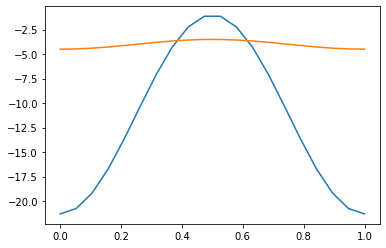

In [216]:
# График средней траектории
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 20)
xj = -11.1596 - 10.1579*np.cos(2*np.pi*t)
xa = -4.0033 - 0.4988*np.cos(2*np.pi*t)

plt.plot(t, xj)
plt.plot(t, xa)


In [229]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution

def F(L):
   Aj = L[0]
   Bj = L[1]
   Aa = L[2]
   Ba = L[3]
   M1 = sigma1*(Aj + D)
   M2 = -sigma2*(Aj + D + Bj/2)
   M3 = -2*(np.pi*Bj)**2
   M4 = -((Aj + D0)**2 + (Bj**2)/2)
   M5 = sigma1*(Aa + D)
   M6 = -sigma2*(Aa + D + Ba/2)
   M7 = -2*(np.pi*Ba)**2
   M8 = -((Aa + D0)**2 + (Ba**2)/2)
   r = alpha_a*M5 + betta_a*M7 + delta_a*M8
   s = gamma_a*M6
   p = alpha_j*M1 + betta_j*M3 + delta_j*M4
   q = gamma_j*M2
   return -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)

L = np.array([-11.1596, -10.1579, -4.0033, -0.4988])

N = differential_evolution(F, bounds=((-D, 0), (-min(L[0] + D, -L[0]), min(L[0] + D, -L[0])), (-D, 0), (-min(L[2] + D, -L[2]), min(L[2] + D, -L[2]))))
N

C:\Users\MANDAR~1\AppData\Local\Temp/ipykernel_716/1114725030.py:22: RuntimeWarning: invalid value encountered in sqrt
  return -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)


     fun: nan
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 60165
     nit: 1000
 success: False
       x: array([ -52.22648228,    9.3678868 , -114.72005621,   -1.221223  ])

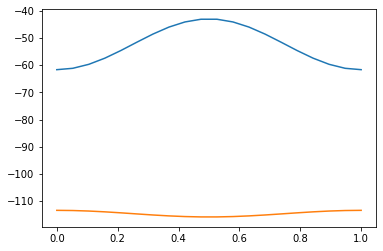

In [230]:
#PLOTS
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 1, 20)
xj = -52.22648228 - 9.3678868*np.cos(2*np.pi*t)
xa = -114.72005621 - -1.221223*np.cos(2*np.pi*t)

plt.plot(t, xj)
plt.plot(t, xa)
